In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

#predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_nounk.npy")
predicted_labels= np.load("./laps_nobg_100/predictions.npy")
#predicted_labels = np.argmax(predictions, axis=1)
print(np.shape(predicted_labels))

#real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")
real_labels = np.load("./laps_nobg_100/real_labels.npy")
print(np.shape(real_labels))

#measures = np.load("focus_measure_ndsb_nounk.npy")
measures = np.load("focus_valid_laps.npy")
print(np.shape(measures))


(518,)
(518,)
(518, 5)


In [36]:
data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2], 'gblvar':measures[:,3], 'totvar':measures[:,4]})

data.head()

,gblvar,lapm,lapv,predicted,real,teng,totvar
0,0.078619,0.062546,0.038825,2,3,0.636660,7835.740039
1,0.024910,0.043574,0.003948,13,7,0.112697,8489.485862
2,0.005880,0.070231,0.015677,17,17,0.040518,8795.167319
3,0.035273,0.060877,0.014352,0,1,0.198906,8415.278765
4,0.010457,0.039253,0.005078,17,17,0.142213,8710.637350


In [37]:
measures_log = np.log(measures)

data_log = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures_log[:,0], 'lapm':measures_log[:,1], 'teng':measures_log[:,2], 'gblvar':measures_log[:,3], 'totvar':measures_log[:,4]})

In [3]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


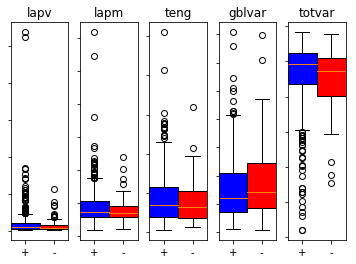

In [38]:
f, a = plt.subplots(1,5, sharex=False, sharey=False)
names = ['lapv', 'lapm', 'teng', 'gblvar', 'totvar']
colors = ['blue', 'red']

i=0
for name in names:
    box_true = data[data['predicted'] == data['real']][name]
    box_false = data[data['predicted'] != data['real']][name]
    bplot = a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'],patch_artist=True)
    a[i].set_title(name)
    a[i].get_yaxis().set_ticklabels('')
    i = i+1
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
f.subplots_adjust(hspace=0)

plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


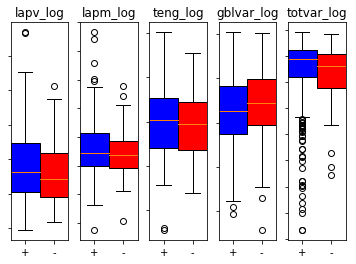

In [39]:
f, a = plt.subplots(1,5, sharex=False, sharey=False)
names = ['lapv', 'lapm', 'teng', 'gblvar', 'totvar']

i=0
for name in names:
    box_true = data_log[data_log['predicted'] == data_log['real']][name]
    box_false = data_log[data_log['predicted'] != data_log['real']][name]
    bplot = a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'],patch_artist=True)
    a[i].set_title(name + '_log')
    a[i].get_yaxis().set_ticklabels('')
    i = i+1
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    
f.subplots_adjust(hspace=0)

plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


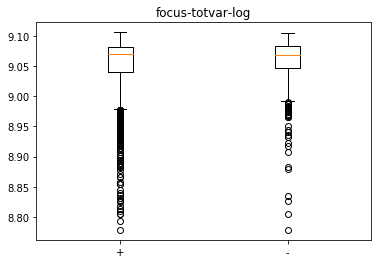

In [4]:
f, a = plt.subplots()
box_true = data_log[data_log['predicted'] == data_log['real']]['totvar']
box_false = data_log[data_log['predicted'] != data_log['real']]['totvar']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('focus-totvar-log')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


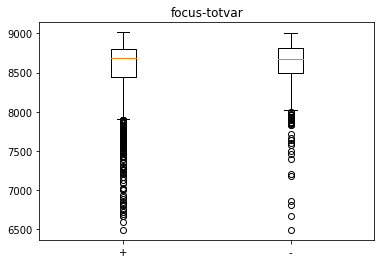

In [5]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['totvar']
box_false = data[data['predicted'] != data['real']]['totvar']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('focus-totvar')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
f, a = plt.subplots(1,13, sharex=False, sharey=True)

colors = ['blue', 'red']

for i in range(13):
    j = i+14
    box_true = data[data['predicted'] == j][data['real'] == j]['gblvar']
    box_false = data[data['predicted'] != j][data['real'] == j]['gblvar']
    print("loading", j)
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(j)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax.set_xlabel('Variance of Laplacian')
ax.set_ylabel('Modified Laplacian')

In [ ]:
fig1, ax1 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax1.set_xlabel('Variance of Laplacian')
ax1.set_ylabel('Tenengrad')

In [ ]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,0], true_false, s=0.6)

ax3.set_xlabel('Variance of Laplacian')
ax3.set_ylabel('Predições negativas e positivas')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,1], true_false, s=0.5)

ax3.set_xlabel('Modified Laplacian')
ax3.set_ylabel('Predições positivas')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,2], true_false, s=0.5)

ax3.set_xlabel('Tenengrad')
ax3.set_ylabel('Predições positivas')

In [ ]:
predicted_labels = np.load("./laps_nobg_100/predictions.npy")
#predicted_labels = np.argmax(predictions, axis=1)

real_labels = np.load("./laps_nobg_100/real_labels.npy")

measures = np.load("focus_valid_laps.npy")

data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2], 'gblvar':measures[:,3], 'totvar':measures[:,4]})

data 

In [ ]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

for i in range(20):
    box_true = data[data['predicted'] == i][data['real'] == i]['gblvar']
    box_false = data[data['predicted'] != i][data['real'] == i]['gblvar']
    a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'])
    a[i].set_title(i)
    
f.subplots_adjust(hspace=0)
plt.show()


In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapv']
box_false = data[data['predicted'] != data['real']]['lapv']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapm']
box_false = data[data['predicted'] != data['real']]['lapm']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['teng']
box_false = data[data['predicted'] != data['real']]['teng']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1
measures_log = np.log(measures)

fig10, ax10 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax10.set_xlabel('Variance of Laplacian')
ax10.set_ylabel('Modified Laplacian')

In [ ]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

In [ ]:
import gzip
train_path = "./laps_nobg_100/images_train.npy.gz"
#labels_path = "./laps_nobg_100/labels_train.npy.gz"
#with gzip.open(labels_path, "rb") as f:
#    labels = np.load(f)

#train_idx = np.load("./laps_nobg_100/indices_train.npy")
valid_idx = np.load("./laps_nobg_100/indices_valid.npy")

with gzip.open(train_path, "rb") as f:
    imgs = np.load(f)
    
img_valid = imgs[valid_idx]


In [ ]:
print(data.iloc[1])
plt.imshow(img_valid[1], cmap='gray')
plt.show

In [ ]:
print(data.iloc[22])
plt.imshow(img_valid[22], cmap='gray')
plt.show

In [ ]:
print(data.iloc[5])
plt.imshow(img_valid[5], cmap='gray')
plt.show

In [ ]:
print(data.iloc[512])
plt.imshow(img_valid[512], cmap='gray')
plt.show

In [ ]:
print(data.iloc[506])
plt.imshow(img_valid[506], cmap='gray')
plt.show

In [ ]:
import scipy.ndimage

In [ ]:
gblvar = scipy.ndimage.uniform_filter(img_valid[1])

In [ ]:
gblvar


In [ ]:
np.var(gblvar)